# Introduction to Scikit-Learn(sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Leanr library.


In [1]:
What_were_covering =[
"0. An end-to-end Scikit-Learn workflow.",
"1. Getting the data ready.",
"2. Choose the right estimator/algorith for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and leoad a trained model",
"7. Putting it all together" ,]
What_were_covering

['0. An end-to-end Scikit-Learn workflow.',
 '1. Getting the data ready.',
 '2. Choose the right estimator/algorith for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and leoad a trained model',
 '7. Putting it all together']

## 0. An en-to-end Scikit-Learn workflow

In [2]:
import numpy as np

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("datas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
## With this we can filter the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
Y = heart_disease["target"]

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)  #Classifier Clf

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [8]:
clf.fit(X_train, Y_train);

In [9]:
# Make a prediction
# y_label = clf.predict(np.array([0, 2, 3, 4]))  #This one throw an error. Because their shape and size not same

In [10]:
y_preds = clf.predict(X_test)
y_preds 

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [11]:
Y_test

105    1
131    1
41     1
64     1
202    0
      ..
143    1
17     1
15     1
291    0
207    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the training data and test data
#(Ne kadar iyi modeli eğittiğimizi gösterir.)
clf.score(X_train, Y_train)

1.0

In [13]:
clf.score(X_test, Y_test)

0.8852459016393442

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score;


print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.96      0.82      0.89        33

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [15]:
confusion_matrix(Y_test, y_preds)

array([[27,  1],
       [ 6, 27]], dtype=int64)

In [16]:
accuracy_score(Y_test, y_preds)

0.8852459016393442

In [17]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {round(clf.score(X_test, Y_test) * 100)}%")

Trying model with 10 estimators
Model accuracy on test set: 90%
Trying model with 20 estimators
Model accuracy on test set: 90%
Trying model with 30 estimators
Model accuracy on test set: 90%
Trying model with 40 estimators
Model accuracy on test set: 85%
Trying model with 50 estimators
Model accuracy on test set: 82%
Trying model with 60 estimators
Model accuracy on test set: 90%
Trying model with 70 estimators
Model accuracy on test set: 93%
Trying model with 80 estimators
Model accuracy on test set: 90%
Trying model with 90 estimators
Model accuracy on test set: 87%


In [18]:
 # 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_first_model_1.pkl", "wb"))  ## wb == write binary

In [19]:
loaded_model = pickle.load(open("random_first_model_1.pkl", "rb")) ## rb == read binary 
loaded_model.score(X_test, Y_test)

0.8688524590163934

# 1. Getting our data ready to be used with machine learning

Three things we have to do:

1. Split the data into features and labels(usually 'x' & 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)
   

In [20]:
What_were_covering

['0. An end-to-end Scikit-Learn workflow.',
 '1. Getting the data ready.',
 '2. Choose the right estimator/algorith for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and leoad a trained model',
 '7. Putting it all together']

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Axes = 1 is the column axes. age sex cp esc.
# Axes = 0 is the row axes. 0, 1, 2, 3 esc.
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
X.shape, len(heart_disease)

((303, 13), 303)

## 1.1 Make sure its all numerical

In [27]:
car_s_extended = pd.read_csv("datas/car-sales-extended.csv")
car_s_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_s_extended)

1000

In [29]:
# Split into X/y
X = car_s_extended.drop("Price", axis=1)
y = car_s_extended["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size=0.2)

#### Without number transforming the data give errors. 
#### All the data should be number. That's why below code throw error

In [30]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor 
##Regressor for calculating number, guessing number
## Classifier is for guessing wheter True or false



#model = RandomForestRegressor()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [31]:
## Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
X_transformed_df = pd.DataFrame(transformed_X)
X_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [33]:
### We can check our data before doing transforming
dummies = pd.get_dummies(car_s_extended[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [34]:
# Let's refit the model
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.3235867221569877

In [35]:
## Checking version
import sklearn
print(sklearn.__version__)

1.4.2


## 1.2 What if there were missing values?

1. Fill them with some values(also knon as imputation)
2. Remove the samples with missing data altogether.

In [36]:
#Import car sales missing data
car_sales_missing = pd.read_csv("datas/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Let's try converting to number

#Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
ont_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

## It didn't throw an error but there lots of missing values and we should do 
## Wheter delete the data where the missing values,
## Or we can add them with values

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>


#### Feature engineering and coding
This nunnumerical values converting to numerical values called as 

#### Option 1: Fill missing data with Pandas

In [39]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [40]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
## We purposly didn't fill the Price column. because It is important.
## We should throw them, delete them.
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [156]:
# Let's try again converting to number

#Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [44]:
car_missin2 = pd.read_csv("datas/car-sales-extended-missing-data.csv")
car_missin2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_missin2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
#Drop the rows with no labels
car_missin2.dropna(subset=["Price"], inplace = True)
car_missin2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split into X and y
X = car_missin2.drop("Price", axis=1)
y = car_missin2["Price"]

In [48]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features),
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
    "one_hot",
    one_hot,
    categorical_features
)], 
   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# Now we'have got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem
some things to note:

* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used a classification estimator
    * Sp Clf is a very common classification varible name or MODEL variable name
* Regression problem - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map:
https://scikit-learn.org/stable/machine_learning_map.html


### 2.1 Picking a machine learning model for a regression problem.

Let's use california Housting Dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing

In [53]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [157]:
housing_df["target"] = housing['target']

In [158]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [58]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge


# Setup random seed
np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into tests and trains

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)



# Check the score of model(on the test set)
model.score(X_test, y_test)


0.5758549611440131

What if 'Ridge' didn't work or the score didn't fit our needs?
Well we could always try different model.

how about we try ensemble methods. Ensemble is a combination of smaller model to try aand make better prediction than just a single model

Sklearn' ensemble models can be found here: https://scikit-learn.org/0.16/modules/ensemble.html

In [59]:
 # Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
# Same as above

#Split into train and test set
# Same as above

#Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8051230593157366

## 2.2 Picking a machine learning model for a classification problem

In [60]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Divide data into parts
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

0.8688524590163934

In [63]:
## Another estimator
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8524590163934426

Tidbit: 

1. If you have structured data, used ensemble methods
    * in a table like this   
2. If you have unstructured data, use deep learning or transfer learning
    * images/ audio/ text something unlike table

In [64]:
What_were_covering

['0. An end-to-end Scikit-Learn workflow.',
 '1. Getting the data ready.',
 '2. Choose the right estimator/algorith for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and leoad a trained model',
 '7. Putting it all together']

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1 Fitting model to the data

Different Names for:
* 'X' = features, features variable, data
* 'y' = labels, targets, target variables

In [65]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier (Use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions: 
1. 'predict()'
2. 'predict_proba()'

In [66]:
# Use a trained model to make predictions
#clf.predict(np.array[122,2,3,55]) #This doesnt't work!!!

In [67]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [68]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [71]:
clf.score(X_test, y_test)

0.8524590163934426

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()

In [73]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:8])
# The right one shows that probability of being  "1"(heart disease)
# The left one shows that probability of being "0"(not heart disease)
# If we sum them the answer should must be 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05]])

In [74]:
# Let's predict() on the same data...
clf.predict(X_test[:8])

array([0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

### Using regression estimator for prediction

In [75]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create model instance
model = RandomForestRegressor()

# Fit the model with data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [77]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [78]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [79]:
len(y_preds), len(y_test)

(4128, 4128)

In [80]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [81]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/estimators:
   1. Estimator's built-in 'score()' method
   2. The 'scoring' parameter
   3. Problem-specifig metric functions 
* You can find the documantation:
* https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [82]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [83]:
## Let's use the 'score()' on our regression problem...

In [84]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

model.score(X_test, y_test)
 

0.8065734772187598

### 4.2 Evaluating a model using the scoring parameter

In [85]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [86]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_sum = np.mean(cross_val_score(clf, X, y, cv=5, scoring=None))

#Compare them
clf_single_score, clf_cross_sum

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report
 
**Accuracy**

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X =  heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

cross_val_s1 = cross_val_score(clf, X, y, cv=5)

In [88]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_s1) * 100 :.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.16%


**Area under the receiver operating characteristic curve (AUC/ROX)**
* Area under curve **(AUC)**
* **ROC** curve

ROC curves are a comparison of a model's true positive rate(tpr) versus a model's false positive rate(fpr).
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [89]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [90]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [91]:
# Calculate fpr, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
thresholds

array([ inf, 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

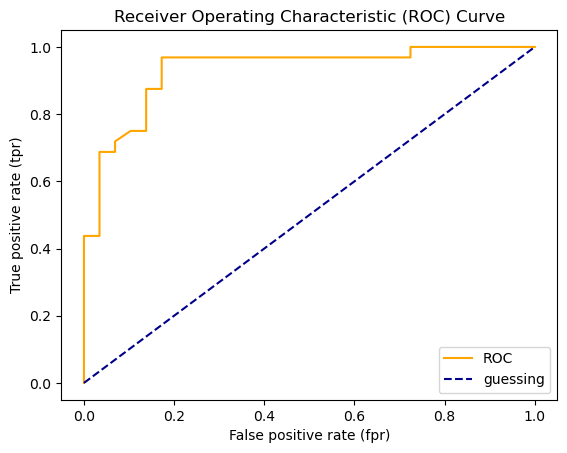

In [92]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="guessing")

    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [93]:
# Calculating AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

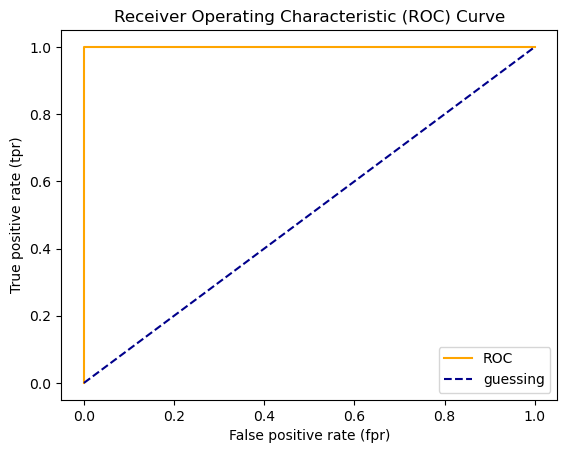

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [95]:
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix
A Confisuon matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [96]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [97]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test
           ,y_preds
           ,rownames=["Actual Label"]
           ,colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


In [98]:
# I downloaded the Seaborn from jupyter notebook. Other option is from ANACONDA PROMPT
import sys #its system
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



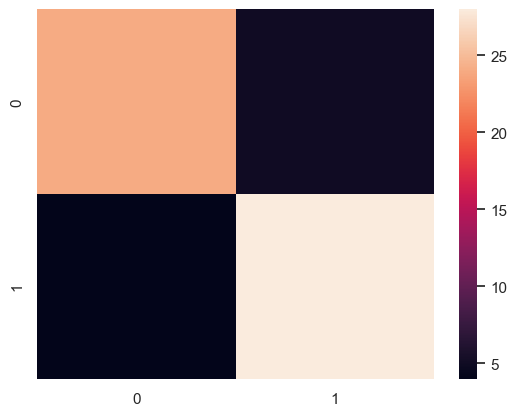

In [99]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.0)

# Create a confisuon matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

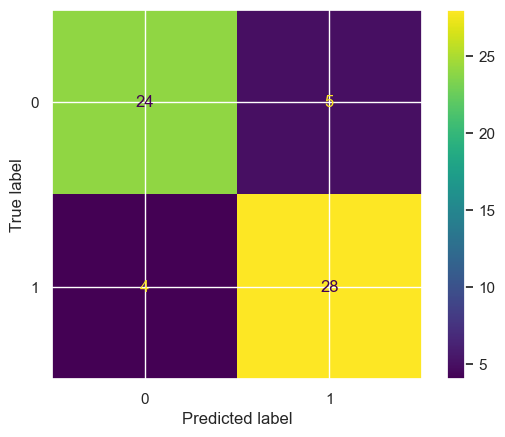

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

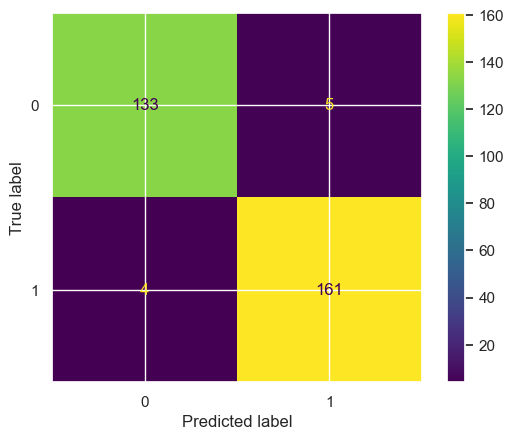

In [101]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                    X=X,
                                    y=y)

### Classification Report

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [103]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(10000) # Model predicts evey case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good mesaure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positive,aim for higher recall.
* **F1-score** is a combination of precision and recall

What we Covered:

* Accuracy Area under the rock curve
* AUC confusion matrix
* Classification Report

### 4.2.2  Regression Model Evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absoulate error(MAE)
3. Mean squared error (MSE)


**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train);

In [105]:
model.score(X_test, y_test)

0.8065734772187598

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [108]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [109]:
r2_score(y_true=y_test,
         y_pred=y_test_mean);

In [110]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [111]:
r2_score(y_true=y_test,
         y_pred=y_pred)

0.8065734772187598

**Mean absoluate error (MAE)**

MAE is the average of the absoulate differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [112]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_preds)
MAE

0.32659871732073664

In [113]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


On average, each one of our predictions is 0.32 plus or minus the Y test value because the absolute in there gets rid of the negative sign 

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [114]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [115]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### 4.2.3 Finally using the scoring parameter

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [117]:
np.random.seed(42)

# Cross - validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
# if scoring=None estimator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [118]:
# Cross-validation accuracy
print(f"The cross validation score is: {np.mean(cv_acc)*100:.2f}%")

The cross validation score is: 82.48%


In [119]:
# Accuracy
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
# Cross-validation accuracy
print(f"The cross validation accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validation accuracy is: 82.48%


In [121]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [122]:
# Cross-validation accuracy
print(f"The cross validation Precision is: {np.mean(cv_precision)*100:.2f}%")

The cross validation Precision is: 83.30%


In [123]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [124]:
# Cross-validation accuracy
print(f"The cross validation Recall is: {np.mean(cv_recall)*100:.2f}%")

The cross validation Recall is: 85.45%


For regression model

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [126]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [127]:
np.mean(cv_r2)

0.6545458023124507

In [128]:
# Mean squared error
np.random.seed(42)

cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
cv_mse

array([-0.51017222, -0.33368897, -0.5403795 ])

In [129]:
np.mean(cv_mse)

-0.46141356443710196

In [130]:
# Mean absolute error
np.random.seed(42)

cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae

array([-0.51754565, -0.42678172, -0.50640477])

In [131]:
np.mean(cv_mse)

-0.46141356443710196

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The third way to evaluate scikit-learn machine learning models/estimators is to using the 'sklearn metrics' module

https://scikit-learn.org/stable/modules/model_evaluation.html

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate model usin evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision score: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall score: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy score: 85.25%
Precision score: 84.85%
Recall score: 87.50%
F1 score: 86.15%


In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop('target', axis=1)
y = housing_df["target"] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make some predictions
y_preds = model.predict(X_test)

# Evaluate model usin evaluation functions
print("Regression metrics on the test set")
print(f"R^2 score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean absoluate error: {mean_absolute_error(y_test, y_preds)*100:.2f}%")
print(f"Mean squared error: {mean_squared_error(y_test, y_preds)*100:.2f}%")



Regression metrics on the test set
R^2 score: 80.66%
Mean absoluate error: 32.66%
Mean squared error: 25.35%


## 5. Improving model

First predictions = baseline predictions.

First model = baseline model.

From a data perspective:
* Could we collect more data ? (generlly, the more data, the better)
* Could we improve our data ?

From a model perspective:
* Is there a better model we could use ?
* Could we improve the current model ?

Hyperparameters vs. Parameters
* Parameters = Model find these patterns in data
* Hyperparameters = Settings on a model you can adjust to(potentially) improve its ability to find patterns

Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [134]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [135]:
clf.get_params() # We can see what our Hyperparameters that we can adjust on our RandomForestClassifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Here the link for more information:   
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

We're going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [136]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels 
    on a classification.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"Accuracy: ": round(accuracy, 2),
                   "Precision: ": round(precision, 2),
                   "Recall: ": round(recall, 2),
                   "F1 Score: ": round(f1)}
    print(f"Acc:       {accuracy *100:.2f}%")
    print(f"Precision: {precision *100:.2f}%")
    print(f"Recall:    {recall *100:.2f}%")
    print(f"F1 Score:  {f1 *100:.2f}%")
    
    return metric_dict    

### Baseline model

In [137]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make it shuffle
heart_disease_shuffled = heart_disease.sample(frac=1).reset_index(drop=True)

# Divide into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Divide %70 train, %15 validation, %15 test
train_range = round(0.7 * len(heart_disease_shuffled))
val_range = round(0.85 *len(heart_disease_shuffled))
X_train, y_train = X[:train_range], y[:train_range] 
X_valid, y_valid = X[train_range:val_range], y[train_range:val_range]
X_test, y_test = X[:val_range], y[:val_range]

clf = RandomForestClassifier()

# fit the model
clf.fit(X_train, y_train)

# Make pred
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)

baseline_metrics

Acc:       82.61%
Precision: 82.14%
Recall:    88.46%
F1 Score:  85.19%


{'Accuracy: ': 0.83, 'Precision: ': 0.82, 'Recall: ': 0.88, 'F1 Score: ': 1}

In [138]:
# We have changed the n_estimators number
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=150)

clf_2.fit(X_train, y_train)

y_pred2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_pred2)
clf_2_metrics

Acc:       80.43%
Precision: 81.48%
Recall:    84.62%
F1 Score:  83.02%


{'Accuracy: ': 0.8, 'Precision: ': 0.81, 'Recall: ': 0.85, 'F1 Score: ': 1}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [139]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & Y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

# fit the randomized model
rs_clf.fit(X_train, y_train) # Why we didn't create validation part. 
# Bacause of the cross validation = 5. It return the validation into itself

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [159]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [141]:
# Make predictions with the best parameters.
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the prediction
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:       81.97%
Precision: 77.42%
Recall:    85.71%
F1 Score:  81.36%


### 5.3 Hyperparameter tuning with GridSearchCV

GridSearchCV try all the possible connection. In grid there are 5 * 4 * 2 * 3 * 3 * (cv=5) = 1800 different connection

In [142]:
grid

{'n_estimators': [10, 100, 200, 500, 1000],
 'max_depth': [None, 5, 10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [143]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}
# We reduced our search spaced of hyper parameters.
# 3 * 2 * 2 * 1 * 2 * (cv=5)= 120  different search space

In [144]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & Y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# fit the GridSearch model
gs_clf.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [145]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [146]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc:       81.97%
Precision: 77.42%
Recall:    85.71%
F1 Score:  81.36%


In [147]:
compare_metrics = pd.DataFrame(data={"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

<Axes: >

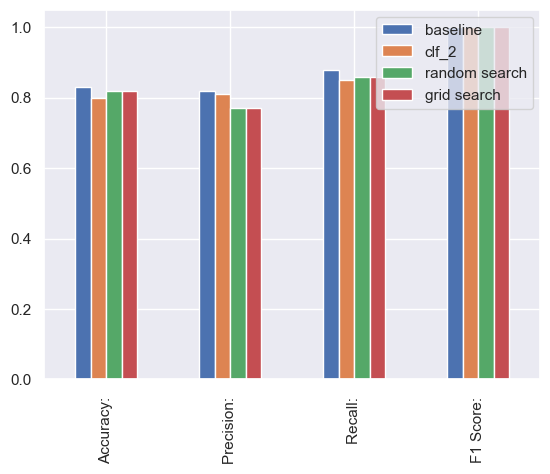

In [148]:
compare_metrics.plot.bar()

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models: 
1. With Python's 'pickle' module
2. With the 'joblib' module

**Pickle**

In [149]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) #wb = write binary

In [150]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb")) #rb=read binary

In [151]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
pickle_metrics = evaluate_preds(y_test, pickle_y_preds)

Acc:       81.97%
Precision: 77.42%
Recall:    85.71%
F1 Score:  81.36%


**Joblib**

In [152]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [153]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [154]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
joblib_evaluate = evaluate_preds(y_test, joblib_y_preds)

Acc:       81.97%
Precision: 77.42%
Recall:    85.71%
F1 Score:  81.36%


## 7. Putting it all together

In [160]:
What_were_covering

['0. An end-to-end Scikit-Learn workflow.',
 '1. Getting the data ready.',
 '2. Choose the right estimator/algorith for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and leoad a trained model',
 '7. Putting it all together']